In [28]:
import pandas as pd
import numpy as np
#import config as cfg
import seaborn as sns

from sklearn.model_selection import train_test_split
import sklearn
import xgboost as xg
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import RepeatedKFold, cross_val_score, KFold
from xgboost import XGBRegressor
from xgboost import plot_importance
import datetime as dt

## 1. Product Clicks

In [53]:
df_clicks =  pd.read_csv("Tables/prod_product_viewed.csv")

In [54]:
df_clicks = df_clicks[['id', 'brand', 'category', 'event', 'event_text', 'name', 'original_timestamp', 'timestamp',\
                       'price', 'product_id', 'price']]
df_clicks

,id,brand,category,event,event_text,name,original_timestamp,timestamp,price,product_id,price
0,ajs-next-a0fa08e1d278e7cf29e4180f5942fdf7,PROARTE,Brush Sets,product_viewed,Product Viewed,PROARTE Pro Brush - (28Pcs),2022-12-28 12:56:45.816 UTC,2022-12-28 12:56:47.366 UTC,17000.0,7524675.0,17000.0
1,ajs-next-b79169f9cf90ebc151114ce3bd88be27,Wet n Wild,Sponges & Applicators,product_viewed,Product Viewed,Wet N Wild Makeup Sponge Applicator,2022-12-28 12:40:56.101 UTC,2022-12-28 12:40:56.843 UTC,509.0,7530242.0,509.0
2,ajs-next-86a9f92af2427dc3c59169b745f47aed,Ustraa,Colognes & After Shaves,product_viewed,Product Viewed,Ustraa After Dark Cologne Perfume - (100ml),2023-02-19 08:02:30.538 UTC,2023-02-19 08:02:31.199 UTC,611.0,7504965.0,611.0
3,ajs-next-838df329be126b305b37301cfbf7fcdd,The Face Shop,Sheet Masks,product_viewed,Product Viewed,The Face Shop Real Nature Green Tea Face Sheet...,2023-02-19 12:22:25.262 UTC,2023-02-19 12:22:25.271 UTC,100.0,7538505.0,100.0
4,ajs-next-5380d8638d3f205d3fde9a67931a0931,Colorbar,Eyebrow Enhancer,product_viewed,Product Viewed,Colorbar Stunning Brow Mini Eyebrow Pencil - 0...,2023-03-12 05:45:04.578 UTC,2023-03-12 05:45:04.433 UTC,239.0,7502178.0,239.0
...,...,...,...,...,...,...,...,...,...,...,...
107451,ajs-next-2eb55cb4f1abf0cae66057482d011459,AND,Womens Perfumes (EDT & EDP),product_viewed,Product Viewed,And Love Muse EDP & Pretty Vogue Mist - (2Pcs),2023-02-10 01:08:54.045 UTC,2023-02-10 01:08:54.041 UTC,1804.0,7539766.0,1804.0
107452,936F9F8D-F71C-4069-8867-956D328AF4E1,Dolce&Gabbana,Womens Perfumes (EDT & EDP),product_viewed,Product Viewed,Dolce & Gabbana Pour Femme Intense EDP (50ml),2023-01-24 09:27:25.3 UTC,2023-01-24 09:27:25.884 UTC,7850.0,7545438.0,7850.0
107453,BC1CE98C-02FF-4D59-9374-72F7A2A1EF2A,Carolina Herrera,Womens Perfumes (EDT & EDP),product_viewed,Product Viewed,Carolina Herrera Very Good Girl Eau De Parfum ...,2023-03-22 16:14:44.032 UTC,2023-03-22 16:14:44.271 UTC,8000.0,7506000.0,8000.0
107454,364BC995-6653-48DF-9BE1-E6768C4CD4EA,Paco Rabanne,Womens Perfumes (EDT & EDP),product_viewed,Product Viewed,Paco Rabanne Pure XS for Her Eau De Parfum (50ml),2023-01-18 04:39:41.583 UTC,2023-01-18 04:39:41.833 UTC,5270.0,7506583.0,5270.0


In [55]:
df_clicks['original_timestamp'] = df_clicks['original_timestamp'].apply(lambda x: x.split(' ')[0] + ' ' + x.split(' ')[1])
df_clicks['timestamp'] = df_clicks['timestamp'].apply(lambda x: x.split(' ')[0] + ' ' + x.split(' ')[1])

df_clicks['timestamp'] = pd.to_datetime(df_clicks['timestamp'], format="%Y-%m-%d %H:%M:%S")
df_clicks['original_timestamp'] = pd.to_datetime(df_clicks['original_timestamp'], format="%Y-%m-%d %H:%M:%S")
df_clicks

,id,brand,category,event,event_text,name,original_timestamp,timestamp,price,product_id,price
0,ajs-next-a0fa08e1d278e7cf29e4180f5942fdf7,PROARTE,Brush Sets,product_viewed,Product Viewed,PROARTE Pro Brush - (28Pcs),2022-12-28 12:56:45.816,2022-12-28 12:56:47.366,17000.0,7524675.0,17000.0
1,ajs-next-b79169f9cf90ebc151114ce3bd88be27,Wet n Wild,Sponges & Applicators,product_viewed,Product Viewed,Wet N Wild Makeup Sponge Applicator,2022-12-28 12:40:56.101,2022-12-28 12:40:56.843,509.0,7530242.0,509.0
2,ajs-next-86a9f92af2427dc3c59169b745f47aed,Ustraa,Colognes & After Shaves,product_viewed,Product Viewed,Ustraa After Dark Cologne Perfume - (100ml),2023-02-19 08:02:30.538,2023-02-19 08:02:31.199,611.0,7504965.0,611.0
3,ajs-next-838df329be126b305b37301cfbf7fcdd,The Face Shop,Sheet Masks,product_viewed,Product Viewed,The Face Shop Real Nature Green Tea Face Sheet...,2023-02-19 12:22:25.262,2023-02-19 12:22:25.271,100.0,7538505.0,100.0
4,ajs-next-5380d8638d3f205d3fde9a67931a0931,Colorbar,Eyebrow Enhancer,product_viewed,Product Viewed,Colorbar Stunning Brow Mini Eyebrow Pencil - 0...,2023-03-12 05:45:04.578,2023-03-12 05:45:04.433,239.0,7502178.0,239.0
...,...,...,...,...,...,...,...,...,...,...,...
107451,ajs-next-2eb55cb4f1abf0cae66057482d011459,AND,Womens Perfumes (EDT & EDP),product_viewed,Product Viewed,And Love Muse EDP & Pretty Vogue Mist - (2Pcs),2023-02-10 01:08:54.045,2023-02-10 01:08:54.041,1804.0,7539766.0,1804.0
107452,936F9F8D-F71C-4069-8867-956D328AF4E1,Dolce&Gabbana,Womens Perfumes (EDT & EDP),product_viewed,Product Viewed,Dolce & Gabbana Pour Femme Intense EDP (50ml),2023-01-24 09:27:25.300,2023-01-24 09:27:25.884,7850.0,7545438.0,7850.0
107453,BC1CE98C-02FF-4D59-9374-72F7A2A1EF2A,Carolina Herrera,Womens Perfumes (EDT & EDP),product_viewed,Product Viewed,Carolina Herrera Very Good Girl Eau De Parfum ...,2023-03-22 16:14:44.032,2023-03-22 16:14:44.271,8000.0,7506000.0,8000.0
107454,364BC995-6653-48DF-9BE1-E6768C4CD4EA,Paco Rabanne,Womens Perfumes (EDT & EDP),product_viewed,Product Viewed,Paco Rabanne Pure XS for Her Eau De Parfum (50ml),2023-01-18 04:39:41.583,2023-01-18 04:39:41.833,5270.0,7506583.0,5270.0


In [56]:
# calculate the date 14 days before today's date
today = dt.date.today()
last_14_days = today - dt.timedelta(days=14)
print(str(last_14_days))

df_clicks['date'] = df_clicks['original_timestamp'].apply(lambda x: x.date())
df_clicks_fortnight = df_clicks[df_clicks['date'] > last_14_days]
df_clicks_fortnight

2023-03-17


,id,brand,category,event,event_text,name,original_timestamp,timestamp,price,product_id,price,date
58,ajs-next-de0166e27c60c0cc472582b34819e299,Bioderma,Makeup Remover,product_viewed,Product Viewed,Bioderma Sensibio H2O Daily Soothing Cleanser ...,2023-03-18 10:17:49.353,2023-03-18 10:17:47.946,355.0,7545921.0,355.0,2023-03-18
71,ajs-next-6c186d678c0cd43dce39703d3097326e,Mirah Belle,Hand Sanitizers,product_viewed,Product Viewed,Mirah Belle Surface Disinfectant Spray (200ml),2023-03-19 22:32:50.304,2023-03-19 22:32:50.332,150.0,7507155.0,150.0,2023-03-19
72,ajs-next-d22c41c040eccd6fddac69b803b44c51,Organic Harvest,Hand Creams,product_viewed,Product Viewed,Organic Harvest Cranberry Hand Cream (50g),2023-03-19 17:17:23.383,2023-03-19 17:17:23.601,196.0,7517185.0,196.0,2023-03-19
80,ajs-next-435de2d8ee09ffd4cf75a26cca907594,PAC,Eye Brush,product_viewed,Product Viewed,PAC Eyeshadow Application Brush - 382 (1Pc),2023-03-22 11:15:44.296,2023-03-22 11:15:44.783,435.0,7541811.0,435.0,2023-03-22
84,ajs-next-4689d939a1ac1798d76e8894b4ded728,Layer'r,Body Mists & Sprays,product_viewed,Product Viewed,Layer'r Wottagirl! Body Splash Set (4Pcs),2023-03-21 10:17:49.408,2023-03-21 10:17:50.059,320.0,7549401.0,320.0,2023-03-21
...,...,...,...,...,...,...,...,...,...,...,...,...
107276,3822D69A-6505-41C1-8421-BD8397EA125E,Versace,Womens Perfumes (EDT & EDP),product_viewed,Product Viewed,Versace Dylan Turquoise Eau De Toilette (50ml),2023-03-22 17:16:36.452,2023-03-22 17:16:36.603,6150.0,7515961.0,6150.0,2023-03-22
107301,8524FC47-CB8B-4772-B67D-69031987A1B7,Plum,Womens Perfumes (EDT & EDP),product_viewed,Product Viewed,Plum Bodylovin Orchid You Not Eau De Parfum - ...,2023-03-22 18:07:05.609,2023-03-22 18:07:06.367,950.0,7528077.0,950.0,2023-03-22
107337,ajs-next-d14cc8169b76857465d46e7490561418,Michael Kors,Womens Perfumes (EDT & EDP),product_viewed,Product Viewed,Michael Kors Sexy Amber Eau de Parfum (50ml),2023-03-20 11:44:12.111,2023-03-20 11:44:12.540,3810.0,7506349.0,3810.0,2023-03-20
107341,b9bddf78-a058-435f-aee0-59bfdf8f92bc,Estee Lauder,Womens Perfumes (EDT & EDP),product_viewed,Product Viewed,Estee Lauder Modern Muse Eau De Parfum (100ml),2023-03-22 13:44:24.978,2023-03-22 13:44:25.272,8075.0,7533342.0,8075.0,2023-03-22


In [57]:
df_clicks_fortnight.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8296 entries, 58 to 107453
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  8296 non-null   object        
 1   brand               8197 non-null   object        
 2   category            8197 non-null   object        
 3   event               8296 non-null   object        
 4   event_text          8296 non-null   object        
 5   name                8197 non-null   object        
 6   original_timestamp  8296 non-null   datetime64[ns]
 7   timestamp           8296 non-null   datetime64[ns]
 8   price               8206 non-null   float64       
 9   product_id          8197 non-null   float64       
 10  price               8206 non-null   float64       
 11  date                8296 non-null   object        
dtypes: datetime64[ns](2), float64(3), object(7)
memory usage: 842.6+ KB


## Brand-wise Clicks

In [58]:
df_clicks_brand = df_clicks_fortnight.copy()
df_clicks_brand['brand'].value_counts()

Lakme                  458
Maybelline New York    458
M.A.C                  414
Estee Lauder           300
L'Oreal Paris          295
                      ... 
Coach                    1
Jean Paul Gaultier       1
Urban Veda               1
BrownSkin Beauty         1
Maxxcode                 1
Name: brand, Length: 391, dtype: int64

In [59]:
df_clicks_brand['clicks'] = np.zeros(len(df_clicks_brand))
df_clicks_brand = df_clicks_brand.groupby('brand', as_index=False).agg({'clicks': 'count'})
df_clicks_brand.sort_values('clicks', ascending=False)

,brand,clicks
195,Lakme,458
224,Maybelline New York,458
209,M.A.C,414
114,Estee Lauder,300
186,L'Oreal Paris,295
...,...,...
223,Maxxcode,1
215,Majestique,1
210,M.Micallef,1
203,Lottie London,1


## Category-wise Clicks

In [62]:
brand_to_category_dict = dict(zip(df_clicks_fortnight['brand'], df_clicks_fortnight['category']))
brand_to_category_dict

{'Bioderma': 'Face Moisturiser',
 'Mirah Belle': 'Body Wash & Shower Gel',
 'Organic Harvest': 'Serums & Essences',
 'PAC': 'Face Moisturiser',
 "Layer'r": 'Body Mists & Sprays',
 'L’Oreal Paris': 'Liquid Lipstick',
 'CLINIQUE': 'Serums & Essences',
 'Indica': 'Hair Colour',
 'Vaseline': 'Lotions & Cream',
 'MYGLAMM': 'Liquid Lipstick',
 'Star Struck by Sunny Leone': 'Lipstick',
 'mCaffeine': 'Body Wash & Shower Gel',
 'Vega': 'Trimmers',
 'Colorbar': 'Face Moisturiser',
 'Skin Elements': 'Intimate Care',
 'Nivea': 'Mens Deodorants & Roll-Ons',
 'Babila': 'Face Brush',
 'Bold Care': 'Shampoo',
 'ASA beauty': 'Lip Stain',
 'Farmacy Beauty': 'Serums & Essences',
 'Plum': 'Womens Perfumes (EDT & EDP)',
 'M.A.C': 'Face Moisturizer',
 'Mamaearth': 'Mens Perfumes (EDT & EDP)',
 'Soulflower': 'Serums & Essences',
 'Gillette': 'Razors & Cartridges',
 'India Grooming Club': 'Shavers',
 'Anastasia Beverly Hills': 'Eye Palettes',
 "Re'equil": 'Serums & Essences',
 'Beardo': 'Mens Deodorants & Rol

In [63]:
len(brand_to_category_dict.keys())

392

In [64]:
df_clicks_category = df_clicks_fortnight.copy()
df_clicks_category['clicks'] = np.zeros(len(df_clicks_category))
df_clicks_category = df_clicks_category.groupby('category', as_index=False).agg({'clicks': 'count'})
df_clicks_category.sort_values('clicks', ascending=False)

,category,clicks
113,Lipstick,725
114,Liquid Lipstick,512
38,Concealer,444
73,Foundation,427
147,Serums & Essences,414
...,...,...
9,Beard Balm,1
154,Shaving Foams,1
18,Beard Wax,1
46,Eye Care Eye Masks,1


## 2. Order Completed

In [73]:
df_order_completed = pd.read_csv("Tables/prod_order_completed.csv")
df_order_completed = df_order_completed[df_order_completed['products'].isnull() == False]


df_order_completed['original_timestamp'] = df_order_completed['original_timestamp'].apply(lambda x: x.split(' ')[0] + ' ' + x.split(' ')[1])
df_order_completed['timestamp'] = df_order_completed['timestamp'].apply(lambda x: x.split(' ')[0] + ' ' + x.split(' ')[1])

df_order_completed['timestamp'] = pd.to_datetime(df_order_completed['timestamp'], format="%Y-%m-%d %H:%M:%S")
df_order_completed['original_timestamp'] = pd.to_datetime(df_order_completed['original_timestamp'], format="%Y-%m-%d %H:%M:%S")
df_order_completed

,id,event,event_text,original_timestamp,timestamp,products
0,ajs-next-353b3bbae250ca5e75ae35dbc4e9bbad,order_completed,Order Completed,2023-02-26 18:00:09.277,2023-02-26 18:00:09.718,"[{""brand"":""Estee Lauder"",""name"":""Estee Lauder ..."
1,ajs-next-edc545249f1bd71743b85eaddd8fae4c,order_completed,Order Completed,2022-08-24 10:19:02.284,2022-08-24 10:19:03.117,"[{""item_brand"":""Elle 18"",""item_id"":7503415,""it..."
2,ajs-next-1601c54194fd585e0cc7032c5f94f0bc,order_completed,Order Completed,2022-12-28 05:02:13.159,2022-12-28 05:02:13.681,"[{""brand"":""M.A.C"",""name"":""M.A.C Matte Lipstick..."
3,ajs-next-cd28c1aa890b9e7cd325c6b56e101375,order_completed,Order Completed,2023-01-31 17:02:06.200,2023-01-31 17:02:06.554,"[{""brand"":""Streax"",""name"":""Streax Insta Shampo..."
4,ajs-next-dfda63d40e976232f0c494c550cfc30b,order_completed,Order Completed,2023-03-08 15:08:17.092,2023-03-08 15:08:18.351,"[{""brand"":""Keya Seth Aromatherapy"",""name"":""Key..."
...,...,...,...,...,...,...
3302,EF5E4D5F-5BAF-4D67-BA86-5E69F9FCFCAE,order_completed,Order Completed,2023-01-09 12:04:27.215,2023-01-09 12:04:27.738,"[{""brand"":""Garnier"",""category"":""Hair Color"",""c..."
3303,C100E5B9-5DC3-4679-A418-29B72A129055,order_completed,Order Completed,2023-01-07 17:05:19.838,2023-01-07 17:05:19.968,"[{""brand"":""Garnier"",""category"":""Hair Color"",""c..."
3304,18D0E75E-211E-484A-917A-B44BEE0B4149,order_completed,Order Completed,2023-01-09 12:03:57.569,2023-01-09 12:03:58.046,"[{""brand"":""Garnier"",""category"":""Hair Color"",""c..."
3305,87C72BEE-1C7A-40BB-A173-A1E1811BD08B,order_completed,Order Completed,2023-01-09 12:22:07.610,2023-01-09 12:22:45.692,"[{""brand"":""Garnier"",""category"":""Hair Color"",""c..."


In [74]:
# calculate the date 14 days before today's date
today = dt.date.today()
last_14_days = today - dt.timedelta(days=14)
print(str(last_14_days))

df_order_completed['date'] = df_order_completed['original_timestamp'].apply(lambda x: x.date())
df_order_completed = df_order_completed[df_order_completed['date'] > last_14_days]
df_order_completed

2023-03-17


,id,event,event_text,original_timestamp,timestamp,products,date
52,7E46F7DF-59A0-45DC-944D-A4E5FCBDD1FE,order_completed,Order Completed,2023-03-19 08:02:09.556,2023-03-19 08:02:09.956,"[{""brand"":""Guess"",""category"":""Perfume"",""coupon...",2023-03-19
53,9b5daecd-0061-42fa-93f1-fe985849aeac,order_completed,Order Completed,2023-03-21 16:30:25.064,2023-03-21 16:30:24.615,"[{""brand"":""Nivea"",""category"":""Womens Deodorant...",2023-03-21
118,EB0F6006-31F3-4BE3-877E-A873F0540C55,order_completed,Order Completed,2023-03-19 04:52:56.934,2023-03-19 04:52:58.661,"[{""brand"":""CLINIQUE"",""category"":""Face Moisturi...",2023-03-19
121,ajs-next-c3ae4cf3ebbd48ace009e83a20a2caad,order_completed,Order Completed,2023-03-22 07:27:29.692,2023-03-22 07:27:30.140,"[{""brand"":""COSRX"",""name"":""COSRX Balancium Comf...",2023-03-22
135,06BE2A26-4E91-4AC1-BEED-F6608B422DE7,order_completed,Order Completed,2023-03-20 15:24:59.155,2023-03-20 15:24:59.290,"[{""brand"":""Herbal Me"",""category"":""Massage Oil""...",2023-03-20
...,...,...,...,...,...,...,...
2323,ajs-next-2b08e9683f8e5b8828e2b0dbde035637,order_completed,Order Completed,2023-03-18 08:52:31.597,2023-03-18 08:52:31.752,"[{""brand"":""Brillare"",""name"":""Brillare Heavy Mo...",2023-03-18
2328,f1f7289a-71c8-43b9-a3af-c74c38b67e42,order_completed,Order Completed,2023-03-19 18:17:44.791,2023-03-19 18:17:46.167,"[{""brand"":""Neutrogena"",""category"":""Face Sunscr...",2023-03-19
2329,28d0bb4e-1ff4-44c5-a44d-e607d4eb80c8,order_completed,Order Completed,2023-03-19 10:43:13.832,2023-03-19 10:43:14.878,"[{""brand"":""Sebamed"",""category"":""Face Moisturis...",2023-03-19
2378,34735A31-2E13-4141-A711-34D86EC243EB,order_completed,Order Completed,2023-03-18 06:46:37.180,2023-03-18 06:46:37.345,"[{""brand"":""Mancode"",""category"":""Beard Wash"",""c...",2023-03-18


In [75]:
df_order_completed = pd.concat([pd.DataFrame(eval(x)) for x in df_order_completed['products']], \
                               keys=df_order_completed['original_timestamp']).reset_index(level=1, drop=True).reset_index()
df_order_completed

,original_timestamp,brand,category,coupon,currency,name,price,product_id,quantity
0,2023-03-19 08:02:09.556,Guess,Perfume,TIRA20 coupon applied,INR,Guess Dare Eau de Toilette (100ml),3150,7505619,1
1,2023-03-21 16:30:25.064,Nivea,Womens Deodorants & Roll-Ons,,NaN,Nivea Women Pearl & Beauty Deodorant Roll On 4...,159,7515926,1
2,2023-03-21 16:30:25.064,Vaseline,Body Lotions & Moisturisers,,NaN,Vaseline Ice Cool Hydration Lotion - (400ml),297,7527642,1
3,2023-03-21 16:30:25.064,Lakme,Sheet Masks,,NaN,Lakme Blush & Glow Pomegranate Sheet Mask (25ml),62,7539604,1
4,2023-03-19 04:52:56.934,CLINIQUE,Face Moisturiser,,INR,Clinique Moisture Surge 100H Auto Replenishing...,1170,7543062,1
...,...,...,...,...,...,...,...,...,...
473,2023-03-18 06:46:37.180,Dove,Shampoo,TIRA20 coupon applied,INR,Dove Daily Shine Hair Shampoo (1000ml),999,7537575,1
474,2023-03-18 06:46:37.180,Nivea,Shower Gels & Body Wash,TIRA20 coupon applied,INR,Nivea Active Clean Body Wash And Shower Gel (2...,233,7517184,2
475,2023-03-18 06:46:37.180,Nivea,Face Wash,TIRA20 coupon applied,INR,Nivea Men Oil Control All-In-One 10X Vitamin C...,299,7521432,2
476,2023-03-18 09:25:04.633,Minimalist,NaN,NaN,NaN,Minimalist SPF 60 PA ++++ Face Sunscreen With ...,599,7532090,1


In [76]:
df_order_completed = df_order_completed.fillna('0')
for i, row in df_order_completed.iterrows():
    if (row['brand'] == '0'):
        row['brand'] = row['item_brand']
    if (row['name'] == '0'):
        row['name'] = row['item_name']
    if (row['product_id'] == '0'):
        row['product_id'] = row['item_id']
    if (row['category'] == '0'):
        if (row['brand'] in brand_to_category_dict.keys()):
            row['category'] = brand_to_category_dict[row['brand']]
    if (row['price'] == '0'):
        row['price'] = row['item_price']
    if (row['quantity'] == '0'):
        row['quantity'] = row['item_quantity']

In [77]:
df_order_completed['price'] = df_order_completed['price'].astype(float)
df_order_completed['quantity'] = df_order_completed['quantity'].astype(float)

df_order_completed['quantity'] = df_order_completed['quantity'].apply(lambda x: 1 if x == 0 else x)
df_order_completed['category'] = df_order_completed['category'].apply(lambda x: 'not set' if x == '0' else x)
df_order_completed

,original_timestamp,brand,category,coupon,currency,name,price,product_id,quantity
0,2023-03-19 08:02:09.556,Guess,Perfume,TIRA20 coupon applied,INR,Guess Dare Eau de Toilette (100ml),3150.0,7505619,1.0
1,2023-03-21 16:30:25.064,Nivea,Womens Deodorants & Roll-Ons,,0,Nivea Women Pearl & Beauty Deodorant Roll On 4...,159.0,7515926,1.0
2,2023-03-21 16:30:25.064,Vaseline,Body Lotions & Moisturisers,,0,Vaseline Ice Cool Hydration Lotion - (400ml),297.0,7527642,1.0
3,2023-03-21 16:30:25.064,Lakme,Sheet Masks,,0,Lakme Blush & Glow Pomegranate Sheet Mask (25ml),62.0,7539604,1.0
4,2023-03-19 04:52:56.934,CLINIQUE,Face Moisturiser,,INR,Clinique Moisture Surge 100H Auto Replenishing...,1170.0,7543062,1.0
...,...,...,...,...,...,...,...,...,...
473,2023-03-18 06:46:37.180,Dove,Shampoo,TIRA20 coupon applied,INR,Dove Daily Shine Hair Shampoo (1000ml),999.0,7537575,1.0
474,2023-03-18 06:46:37.180,Nivea,Shower Gels & Body Wash,TIRA20 coupon applied,INR,Nivea Active Clean Body Wash And Shower Gel (2...,233.0,7517184,2.0
475,2023-03-18 06:46:37.180,Nivea,Face Wash,TIRA20 coupon applied,INR,Nivea Men Oil Control All-In-One 10X Vitamin C...,299.0,7521432,2.0
476,2023-03-18 09:25:04.633,Minimalist,not set,0,0,Minimalist SPF 60 PA ++++ Face Sunscreen With ...,599.0,7532090,1.0


In [78]:
df_order_completed.sort_values('quantity', ascending=False)

,original_timestamp,brand,category,coupon,currency,name,price,product_id,quantity
245,2023-03-22 20:11:16.156,Estee Lauder,Skin Cleanser,,0,Estee Lauder Nutritious Super Pomegranate Radi...,3000.0,7524005,16.0
429,2023-03-22 18:01:58.720,M.A.C,Face Primer,,0,M.A.C Prep + Prime Fix+ - Original (100ml),1950.0,7519188,13.0
404,2023-03-23 04:12:40.635,Brillare,Shampoo,,0,"Brillare Dandruff Control Shampoo For Itchy, F...",495.0,7537533,12.0
207,2023-03-20 07:18:19.277,Himalaya,not set,0,0,Himalaya Nourishing Baby Soap (125g),33.0,7517157,10.0
316,2023-03-20 12:06:03.275,Himalaya,not set,0,0,Himalaya Nourishing Baby Soap (125g),33.0,7517157,10.0
...,...,...,...,...,...,...,...,...,...
159,2023-03-20 16:10:26.578,Lakme,Compact,TIRA10 coupon applied,INR,Lakme Face It Compact - Pearl (9g),153.0,7547005,1.0
158,2023-03-22 17:56:54.167,AXE,Mens Deodorants & Roll-Ons,,0,AXE Signature Ticket Dark Temptation Pocket De...,70.0,7518409,1.0
157,2023-03-19 06:27:27.087,Lakme,not set,0,0,Lakme Blush & Glow Lemon Freshness Gel Face Wa...,175.0,7551364,1.0
156,2023-03-19 06:27:27.087,Lakme,not set,0,0,Lakme Sun Expert SPF 30 Ultra Matte Lotion (10...,359.0,7546957,1.0


## Brand-wise

In [80]:
df_order_completed_brand = df_order_completed.copy()

In [81]:
df_order_completed_brand['no_of_unique_purchases'] = np.zeros(len(df_order_completed_brand))

df_grouped = df_order_completed_brand.groupby('brand', as_index=False).agg({'price':'sum', 'quantity':'sum', 'no_of_unique_purchases': 'count'})
df_grouped.rename(columns={'quantity':'no_of_purchases'}, inplace=True)
df_grouped.sort_values(by='no_of_unique_purchases', ascending=False, inplace=True)
df_grouped

,brand,price,no_of_purchases,no_of_unique_purchases
51,Lakme,10039.0,43.0,41
11,Brillare,3960.0,32.0,21
59,Maybelline New York,9765.0,20.0,20
62,MyGlamm,9489.0,18.0,17
60,Minimalist,9683.0,19.0,17
...,...,...,...,...
74,Paco Rabanne,4218.0,1.0,1
75,Palmolive,218.0,1.0,1
78,Pee Safe,149.0,1.0,1
80,Pond's,49.0,3.0,1


In [82]:
df_grouped[df_grouped['brand'] == 'Dove']

,brand,price,no_of_purchases,no_of_unique_purchases
25,Dove,1839.0,5.0,5


In [83]:
df_order_completed_brand = df_grouped.copy()

## Category-wise

In [84]:
df_order_completed_category = df_order_completed.copy()

In [85]:
df_order_completed_category['no_of_unique_purchases'] = np.zeros(len(df_order_completed_category))

df_grouped = df_order_completed_category.groupby('category', as_index=False).agg({'price':'sum', 'quantity':'sum', 'no_of_unique_purchases': 'count'})
df_grouped.rename(columns={'quantity':'no_of_purchases'}, inplace=True)
df_grouped.sort_values(by='no_of_unique_purchases', ascending=False, inplace=True)
df_grouped

,category,price,no_of_purchases,no_of_unique_purchases
71,not set,85592.0,265.0,212
19,Face Moisturiser,15471.0,25.0,22
61,Shampoo,7200.0,25.0,14
65,Soaps,1323.0,11.0,11
11,Concealer,11168.0,14.0,11
...,...,...,...,...
32,Hair Mask,490.0,1.0,1
45,Lip Plumper,2450.0,1.0,1
43,Lip Liner,540.0,1.0,1
42,Lip Crayon,359.0,1.0,1


In [86]:
df_order_completed_category = df_grouped.copy()

## 3. Adds to Wishlist

In [89]:
df_wishlist = pd.read_csv('Tables/prod_adds_to_wishlist.csv')

In [90]:
df_wishlist['original_timestamp'] = df_wishlist['original_timestamp'].apply(lambda x: x.split(' ')[0] + ' ' + x.split(' ')[1])
df_wishlist['timestamp'] = df_wishlist['timestamp'].apply(lambda x: x.split(' ')[0] + ' ' + x.split(' ')[1])

df_wishlist['timestamp'] = pd.to_datetime(df_wishlist['timestamp'], format="%Y-%m-%d %H:%M:%S")
df_wishlist['original_timestamp'] = pd.to_datetime(df_wishlist['original_timestamp'], format="%Y-%m-%d %H:%M:%S")
df_wishlist

,id,brand,category,event,event_text,name,original_timestamp,timestamp,price,product_id,quantity
0,ajs-next-015b7af6596d763141f3d46941181c03,Colorbar,Hand Creams,product_added_to_wishlist,Product Added to Wishlist,Colorbar Toast To Tahiti Fruit Drop Hand Cream...,2022-08-18 04:49:25.199,2022-08-18 04:49:25.534,275.0,7504904.0,1.0
1,ajs-next-3c228cfd2f01ea106b9334a279c7ad2b,India Grooming Club,Shavers,product_added_to_wishlist,Product Added to Wishlist,India Grooming Club Black Shaving Razor Handle...,2023-03-06 03:03:23.175,2023-03-06 03:03:23.144,16000.0,7521080.0,1.0
2,ajs-next-6f9ab2addfcee447d343fca05b7e8f1f,Vega,Mani-Pedi Tools & Kits,product_added_to_wishlist,Product Added to Wishlist,"set of Foot care, (PM-03)",2023-03-06 07:43:28.600,2023-03-06 07:43:28.605,NaN,7513281.0,1.0
3,ajs-next-64cd4a9906319b038a2cb26402866a2a,Gillette,Razors & Cartridges,product_added_to_wishlist,Product Added to Wishlist,Gillette Mach 3 Turbo Manual Shaving Razor Bla...,2023-02-25 11:07:47.504,2023-02-25 11:07:48.719,NaN,7547314.0,1.0
4,ajs-next-11fc7950c2e75f7c009cb6b57be395fb,L'Oreal Paris,Hair Colour,product_added_to_wishlist,Product Added to Wishlist,"L'Oreal Paris Casting Creme Gloss Hair Color, ...",2023-02-26 17:54:36.813,2023-02-26 17:54:37.215,NaN,7500061.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
17386,8DD2C8BF-02B3-4FC7-A316-80FBD1C20096,Dove,Womens Deodorants & Roll-Ons,product_added_to_wishlist,Product Added to Wishlist,Dove Original Deodorant Roll On (50ml),2023-02-02 05:36:59.426,2023-02-02 05:36:59.610,220.0,7537511.0,1.0
17387,ajs-next-cf9f70a38cfee45eb521566714b65b7d,Antonio Banderas,Womens Deodorants & Roll-Ons,product_added_to_wishlist,Product Added to Wishlist,Antonio Banderas Blue Seduction for Women Deod...,2023-01-20 09:35:11.579,2023-01-20 09:35:12.191,NaN,7506565.0,1.0
17388,EE89C4EF-8BF7-4984-9851-BD2A9B638C0F,Ajmal,Womens Deodorants & Roll-Ons,product_added_to_wishlist,Product Added to Wishlist,Ajmal Shadow Homme & Sacred Love Deodorant Spr...,2023-02-16 16:29:36.695,2023-02-16 16:29:37.063,327.0,7516334.0,1.0
17389,ajs-next-f227259e9202a58c277f5b1d293768e4,Nivea,Womens Deodorants & Roll-Ons,product_added_to_wishlist,Product Added to Wishlist,Nivea Women Fresh Natural Deodorant Roll On (5...,2023-02-13 09:19:44.375,2023-02-13 09:19:44.676,172.0,7516982.0,1.0


In [91]:
# calculate the date 14 days before today's date
today = dt.date.today()
last_14_days = today - dt.timedelta(days=14)
print(str(last_14_days))

df_wishlist['date'] = df_wishlist['original_timestamp'].apply(lambda x: x.date())
df_wishlist = df_wishlist[df_wishlist['date'] > last_14_days]
df_wishlist

2023-03-17


,id,brand,category,event,event_text,name,original_timestamp,timestamp,price,product_id,quantity,date
7,ajs-next-ce4bedcb9ae29cf7b16081c433ca16b7,Vaseline,Body Lotions & Moisturisers,product_added_to_wishlist,Product Added to Wishlist,Vaseline Intensive Care Cocoa Glow Body Lotion...,2023-03-18 17:40:54.506,2023-03-18 17:40:54.852,210.0,7527613.0,1.0,2023-03-18
8,ajs-next-8716b8751a752dbc0e70805946dd1e4e,Ustraa,Beard Oil,product_added_to_wishlist,Product Added to Wishlist,Ustraa Beard Growth Oil Advanced - (60ml),2023-03-18 17:40:17.349,2023-03-18 17:40:17.683,489.0,7531283.0,1.0,2023-03-18
11,ajs-next-63a67cbfe721c1d76cce140845fb74dc,Mamaearth,Hair Mask,product_added_to_wishlist,Product Added to Wishlist,Mamaearth Onion Hair Mask (200g),2023-03-22 17:16:13.600,2023-03-22 17:16:13.793,557.0,7520766.0,1.0,2023-03-22
12,ajs-next-b81ec1faa80b8dc410eb5c567db84da9,Hunter 1114,Hair Stylings,product_added_to_wishlist,Product Added to Wishlist,Hunter 1114 Raw Matte Clay (86ml),2023-03-22 17:39:09.698,2023-03-22 17:39:11.136,1035.0,7535244.0,1.0,2023-03-22
13,ajs-next-080852bb4ce3d542e0d9b16ca25ab87a,SUGAR Cosmetics,Loose Powder,product_added_to_wishlist,Product Added to Wishlist,Sugar All Set To Go Banana Loose Powder - Beig...,2023-03-22 15:39:47.423,2023-03-22 15:39:46.664,NaN,7502478.0,1.0,2023-03-22
...,...,...,...,...,...,...,...,...,...,...,...,...
17319,ajs-next-da1cb3b0cae0592fca2d8a292411aef3,EMBARK,Womens Deodorants & Roll-Ons,product_added_to_wishlist,Product Added to Wishlist,Embark My Dream For Her - Perfumed Deodorant N...,2023-03-22 05:17:25.580,2023-03-22 05:17:25.930,NaN,7506446.0,1.0,2023-03-22
17324,0A4C2C37-9DF2-4DA0-8941-0CF7D7C79373,Carolina Herrera,Womens Deodorants & Roll-Ons,product_added_to_wishlist,Product Added to Wishlist,Carolina Herrera Very Good Girl Eau De Parfum ...,2023-03-19 07:19:19.041,2023-03-19 07:19:19.235,1699.0,7506482.0,1.0,2023-03-19
17343,853bbf58-8623-41b4-97b5-24414b09b713,Carolina Herrera,Womens Deodorants & Roll-Ons,product_added_to_wishlist,Product Added to Wishlist,Carolina Herrera Very Good Girl Eau De Parfum ...,2023-03-22 16:41:13.842,2023-03-22 16:41:14.813,1699.0,7506482.0,1.0,2023-03-22
17362,a6296ce1-fe37-4572-b5af-c77758d28068,NUSUK,Womens Deodorants & Roll-Ons,product_added_to_wishlist,Product Added to Wishlist,NUSUK Khumrat Al Musk Deodorant Perfume For Me...,2023-03-22 16:14:56.459,2023-03-22 16:14:56.891,275.0,7516939.0,1.0,2023-03-22


In [96]:
df_wishlist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2170 entries, 7 to 17378
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  2170 non-null   object        
 1   brand               2080 non-null   object        
 2   category            2080 non-null   object        
 3   event               2170 non-null   object        
 4   event_text          2170 non-null   object        
 5   name                2080 non-null   object        
 6   original_timestamp  2170 non-null   datetime64[ns]
 7   timestamp           2170 non-null   datetime64[ns]
 8   price               1847 non-null   float64       
 9   product_id          2080 non-null   float64       
 10  quantity            2080 non-null   float64       
 11  date                2170 non-null   object        
dtypes: datetime64[ns](2), float64(3), object(7)
memory usage: 220.4+ KB


## Brand-wise

In [98]:
df_wishlist_brand = df_wishlist.copy()
df_wishlist_brand['no_of_adds_to_wishlist'] = np.zeros(len(df_wishlist_brand))
df_grouped = df_wishlist_brand.groupby('brand', as_index=False)[['brand', 'no_of_adds_to_wishlist', 'price']].\
    agg({'price': 'sum', 'no_of_adds_to_wishlist': 'count'}).sort_values('no_of_adds_to_wishlist', ascending= False)
df_grouped

,brand,price,no_of_adds_to_wishlist
112,Maybelline New York,154035.0,124
53,Dove,33002.0,106
57,Estee Lauder,463725.0,105
99,Lakme,36090.0,92
104,M.A.C,177200.0,89
...,...,...,...
164,Simple,427.0,1
16,Batiste,584.0,1
90,Khadi Natural,134.0,1
132,O.P.I,500.0,1


In [99]:
df_wishlist_brand = df_grouped.copy()

## Category-wise

In [100]:
df_wishlist_category = df_wishlist.copy()

In [101]:
df_wishlist_category['no_of_adds_to_wishlist'] = np.zeros(len(df_wishlist_category))
df_grouped = df_wishlist_category.groupby('category', as_index=False)[['category', 'no_of_adds_to_wishlist', 'price']].\
    agg({'price': 'sum', 'no_of_adds_to_wishlist': 'count'}).sort_values('no_of_adds_to_wishlist', ascending= False)
df_grouped

,category,price,no_of_adds_to_wishlist
112,Serums & Essences,372658.0,136
114,Shampoo,41807.0,110
30,Concealer,99546.0,107
84,Lipstick,70310.0,103
106,Perfume,304381.0,101
...,...,...,...
71,Hand Creams & Masks,243.0,1
81,Lip Plumper,2450.0,1
88,Makeup Palettes,699.0,1
90,Mani-Pedi Tools & Kits,899.0,1


In [102]:
df_wishlist_category = df_grouped.copy()

## 4. Adds to Cart

In [104]:
df_cart = pd.read_csv('tables/prod_adds_to_cart.csv')
df_cart['original_timestamp'] = df_cart['original_timestamp'].apply(lambda x: x.split(' ')[0] + ' ' + x.split(' ')[1])
df_cart['timestamp'] = df_cart['timestamp'].apply(lambda x: x.split(' ')[0] + ' ' + x.split(' ')[1])

df_cart['timestamp'] = pd.to_datetime(df_cart['timestamp'], format="%Y-%m-%d %H:%M:%S")
df_cart['original_timestamp'] = pd.to_datetime(df_cart['original_timestamp'], format="%Y-%m-%d %H:%M:%S")
df_cart

,id,brand,category,event,event_text,name,original_timestamp,timestamp,price,product_id,quantity
0,ajs-next-c38fff6fb4d8b3f7d4e45f8575b28546,Gemblue Biocare,Scrubs & Exfoliators,product_added,Product Added,Gemblue Biocare De-Tan Scrub - (500ml),2023-03-08 17:22:17.928,2023-03-08 17:22:19.833,200.0,7531140.0,1.0
1,ajs-next-218771062abce857b0a4177287076d20,Lakme,Loose Powder,product_added,Product Added,Lakme Rose Face Powder with Sunscreen - Warm P...,2023-03-08 13:45:03.046,2023-03-08 13:45:04.220,314.0,7540496.0,2.0
2,ajs-next-49b830a1cc58005e618b6dfce45cafbb,Maybelline New York,Eyebrow Enhancer,product_added,Product Added,Maybelline New York Define & Blend Brow Pencil...,2023-03-08 04:12:10.713,2023-03-08 04:12:12.233,279.0,7540746.0,1.0
3,ajs-next-a2dd98b12f39e38d225acd4a43f3964a,Insight Cosmetics,Highlighters,product_added,Product Added,Insight Cosmetics Highlighter - Angelic Beauty...,2023-03-08 08:01:05.288,2023-03-08 08:01:05.593,99.0,7511278.0,1.0
4,ajs-next-6c873beeae834de5a180eec6f84b73c5,The Man Company,Beard Serum,product_added,Product Added,The Man Company Caffeine Beard Growth Serum (3...,2023-02-27 08:19:23.885,2023-02-27 08:19:23.917,345.0,7536622.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
60768,ajs-next-d5774566662c83f93c577ee3e70f7445,Plum,Womens Deodorants & Roll-Ons,product_added,Product Added,Plum Bodylovin Feelin So Rose De-Odorizing Pit...,2023-03-14 10:25:17.699,2023-03-14 10:25:17.729,258.0,7536073.0,1.0
60769,ajs-next-3610c7e8d444c8f403fe07fe566bdfc3,Plum,Womens Deodorants & Roll-Ons,product_added,Product Added,Plum Bodylovin Feelin So Rose De-Odorizing Pit...,2023-02-18 02:42:25.654,2023-02-18 02:42:25.673,345.0,7536073.0,1.0
60770,F1FCD8E3-B0B0-4E74-9C9C-34496D231C23,Ajmal,Womens Deodorants & Roll-Ons,product_added,Product Added,Ajmal Wisal Parfum Deodorant (200ml),2023-01-24 08:10:04.715,2023-01-24 08:10:05.111,183.0,7537453.0,1.0
60771,ajs-next-5fb21d2b04c78406e41998b80d8e547a,Dove,Womens Deodorants & Roll-Ons,product_added,Product Added,Dove Original Deodorant - (150ml),2023-03-08 06:39:35.573,2023-03-08 06:39:36.120,180.0,7547395.0,1.0


In [105]:
# calculate the date 14 days before today's date
today = dt.date.today()
last_14_days = today - dt.timedelta(days=14)
print(str(last_14_days))

df_cart['date'] = df_cart['original_timestamp'].apply(lambda x: x.date())
df_cart = df_cart[df_cart['date'] > last_14_days]
df_cart

2023-03-17


,id,brand,category,event,event_text,name,original_timestamp,timestamp,price,product_id,quantity,date
12,ajs-next-ee9a8194f1d2eed7dfe2a2d9b13dd494,VGR,Trimmers,product_added,Product Added,VGR V-123 Trimmer 0 min Runtime 4 Length Settings,2023-03-20 03:09:15.417,2023-03-20 03:09:15.421,5998.0,7539538.0,2.0,2023-03-20
13,ajs-next-d2c197ea8f4c021649d922eacdf9a8a8,Mamaearth,Unisex Perfumes (EDT & EDP),product_added,Product Added,Mamaearth Me First Rain Eau De Parfum (8ml),2023-03-20 18:09:08.674,2023-03-20 18:09:08.939,141.0,7552513.0,1.0,2023-03-20
14,ajs-next-f3a564a12fc91d872c513cea9704facd,Blue Heaven,Eye Shadow,product_added,Product Added,Blue Heaven 12-in-1 Bling Eyeshadow - Cocktail...,2023-03-20 15:40:25.585,2023-03-20 15:40:25.663,225.0,7537706.0,1.0,2023-03-20
79,ajs-next-4bf442ebeba2f5c8104591b106e93be8,SUGAR Cosmetics,Loose Powder,product_added,Product Added,Sugar All Set To Go Banana Loose Powder - Beig...,2023-03-22 19:24:06.117,2023-03-22 19:24:08.511,599.0,7502478.0,1.0,2023-03-22
82,ca9e977f-f852-4163-8401-a4c05537d3b4,L’Oreal Paris,Hair Cream,product_added,Product Added,L’Oreal Paris Hyaluronic Moisture 72H Hydra Fi...,2023-03-22 05:26:03.947,2023-03-22 05:26:04.536,499.0,7523440.0,1.0,2023-03-22
...,...,...,...,...,...,...,...,...,...,...,...,...
60706,ajs-next-6abb1c979fa4e19f6509632582aa031a,Nivea,Womens Deodorants & Roll-Ons,product_added,Product Added,Nivea Women Whitening Smooth Skin Deodorant Ro...,2023-03-21 02:39:57.983,2023-03-21 02:39:58.011,159.0,7517138.0,1.0,2023-03-21
60717,b964fdfa-04f8-4dab-a286-54265936bd8d,Carolina Herrera,Womens Deodorants & Roll-Ons,product_added,Product Added,Carolina Herrera Very Good Girl Eau De Parfum ...,2023-03-22 17:36:59.557,2023-03-22 17:36:59.831,1699.0,7506482.0,1.0,2023-03-22
60726,ajs-next-0a656d650d70705435d8f5d35a5d314c,ST.JOHN,Womens Deodorants & Roll-Ons,product_added,Product Added,"ST.JOHN Cobra Cool, Sports, Envy & Toxic Deodo...",2023-03-20 09:15:35.781,2023-03-20 09:15:35.811,750.0,7518276.0,1.0,2023-03-20
60736,ajs-next-b99e23a694a611dd7df373e7b0d02ddf,Nivea,Womens Deodorants & Roll-Ons,product_added,Product Added,Nivea Women Whitening Smooth Skin Deodorant Ro...,2023-03-20 06:04:25.681,2023-03-20 06:04:26.260,159.0,7517138.0,1.0,2023-03-20


In [108]:
df_cart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7131 entries, 12 to 60750
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  7131 non-null   object        
 1   brand               7001 non-null   object        
 2   category            7001 non-null   object        
 3   event               7131 non-null   object        
 4   event_text          7131 non-null   object        
 5   name                7001 non-null   object        
 6   original_timestamp  7131 non-null   datetime64[ns]
 7   timestamp           7131 non-null   datetime64[ns]
 8   price               7041 non-null   float64       
 9   product_id          7001 non-null   float64       
 10  quantity            7041 non-null   float64       
 11  date                7131 non-null   object        
dtypes: datetime64[ns](2), float64(3), object(7)
memory usage: 724.2+ KB


## Brand-wise

In [109]:
df_cart_brand = df_cart.copy()
df_cart_brand['no_of_adds_to_cart'] = np.zeros(len(df_cart_brand))
df_cart_brand = df_cart_brand.groupby('brand', as_index=False)[['category', 'price', 'quantity', 'no_of_adds_to_cart']]\
    .agg({'price': 'sum', 'quantity': 'sum', 'no_of_adds_to_cart': 'count'}).sort_values('no_of_adds_to_cart', ascending=False)
df_cart_brand

,brand,price,quantity,no_of_adds_to_cart
148,M.A.C,1161400.0,779.0,489
136,L.A. Girl,371192.0,594.0,482
162,Maybelline New York,202129.0,427.0,405
45,CLINIQUE,411647.0,303.0,298
74,Dove,99316.0,384.0,275
...,...,...,...,...
234,Salvatore Ferragamo,4760.0,1.0,1
141,Liril,140.0,1.0,1
144,Love Earth,799.0,1.0,1
145,Lux,266.0,1.0,1


## Category-wise

In [110]:
df_cart_category = df_cart.copy()
df_cart_category['no_of_adds_to_cart'] = np.zeros(len(df_cart_category))
df_cart_category = df_cart_category.groupby('category', as_index=False)[['category', 'price', 'quantity', 'no_of_adds_to_cart']]\
    .agg({'price': 'sum', 'quantity': 'sum', 'no_of_adds_to_cart': 'count'}).sort_values('no_of_adds_to_cart', ascending=False)
df_cart_category

,category,price,quantity,no_of_adds_to_cart
32,Concealer,442558.0,641.0,526
47,Face Moisturiser,1010999.0,780.0,479
120,Perfume,1937421.0,467.0,439
49,Face Primer,968109.0,1101.0,364
94,Lipstick,363992.0,364.0,317
...,...,...,...,...
17,Blush Brush,382.0,1.0,1
132,Shaving Creams,1500.0,1.0,1
131,Shaving Brushes,450.0,1.0,1
81,Immunity Boosters & Vitamin C,549.0,1.0,1


## Joining all tables

In [111]:
# Brand Tables
df_joined_brand = df_clicks_brand.merge(df_order_completed_brand, on='brand', how='inner', suffixes=('', '_order_completes')).\
                            merge(df_wishlist_brand, on='brand', how='inner', suffixes=('', '_wishlist'))
df_joined_brand = df_joined_brand.merge(df_cart_brand, on='brand', how='inner', suffixes=('', '_cart'))
df_joined_brand

,brand,clicks,price,no_of_purchases,no_of_unique_purchases,price_wishlist,no_of_adds_to_wishlist,price_cart,quantity,no_of_adds_to_cart
0,AND,29,1992.0,1.0,1,84462.0,42,187746.0,95.0,89
1,AXE,10,375.0,3.0,3,148.0,2,1089.0,6.0,6
2,Aqualogica,9,1071.0,3.0,3,718.0,3,1782.0,5.0,5
3,Arata,10,1118.0,2.0,2,919.0,1,2196.0,3.0,3
4,Babila,17,130.0,1.0,1,1082.0,4,1223.0,9.0,9
...,...,...,...,...,...,...,...,...,...,...
87,WOW SKIN SCIENCE,20,1014.0,4.0,3,1504.0,5,3821.0,14.0,12
88,Wella Professionals,23,3130.0,3.0,3,1100.0,2,4230.0,4.0,4
89,Yves Rocher,36,10300.0,6.0,4,27150.0,9,370281.0,146.0,143
90,ZM Zayn & Myza,8,339.0,1.0,1,378.0,1,2871.0,9.0,6


In [112]:
df_ml = df_joined_brand[['brand', 'clicks', 'no_of_adds_to_wishlist', 'no_of_adds_to_cart', 'no_of_unique_purchases']].copy()
df_ml

,brand,clicks,no_of_adds_to_wishlist,no_of_adds_to_cart,no_of_unique_purchases
0,AND,29,42,89,1
1,AXE,10,2,6,3
2,Aqualogica,9,3,5,3
3,Arata,10,1,3,2
4,Babila,17,4,9,1
...,...,...,...,...,...
87,WOW SKIN SCIENCE,20,5,12,3
88,Wella Professionals,23,2,4,3
89,Yves Rocher,36,9,143,4
90,ZM Zayn & Myza,8,1,6,1


In [113]:
normalize_cols = ['clicks', 'no_of_adds_to_wishlist', 'no_of_adds_to_cart', 'no_of_unique_purchases']

for column in normalize_cols:
    df_ml[column] = (df_ml[column] - df_ml[column].min()) / (df_ml[column].max() - df_ml[column].min())    

df_ml

,brand,clicks,no_of_adds_to_wishlist,no_of_adds_to_cart,no_of_unique_purchases
0,AND,0.061269,0.333333,0.180328,0.000
1,AXE,0.019694,0.008130,0.010246,0.050
2,Aqualogica,0.017505,0.016260,0.008197,0.050
3,Arata,0.019694,0.000000,0.004098,0.025
4,Babila,0.035011,0.024390,0.016393,0.000
...,...,...,...,...,...
87,WOW SKIN SCIENCE,0.041575,0.032520,0.022541,0.050
88,Wella Professionals,0.048140,0.008130,0.006148,0.050
89,Yves Rocher,0.076586,0.065041,0.290984,0.075
90,ZM Zayn & Myza,0.015317,0.000000,0.010246,0.000


In [114]:
df_ml.sort_values(by='no_of_unique_purchases', ascending=False)

,brand,clicks,no_of_adds_to_wishlist,no_of_adds_to_cart,no_of_unique_purchases
40,Lakme,1.000000,0.739837,0.362705,1.000
10,Brillare,0.065646,0.073171,0.452869,0.500
47,Maybelline New York,1.000000,1.000000,0.827869,0.475
48,Minimalist,0.356674,0.463415,0.295082,0.400
13,CLINIQUE,0.326039,0.235772,0.608607,0.375
...,...,...,...,...,...
54,O3+,0.052516,0.008130,0.016393,0.000
55,OGX,0.043764,0.024390,0.006148,0.000
59,Paco Rabanne,0.017505,0.016260,0.030738,0.000
63,Pond's,0.032823,0.024390,0.036885,0.000


<AxesSubplot:>

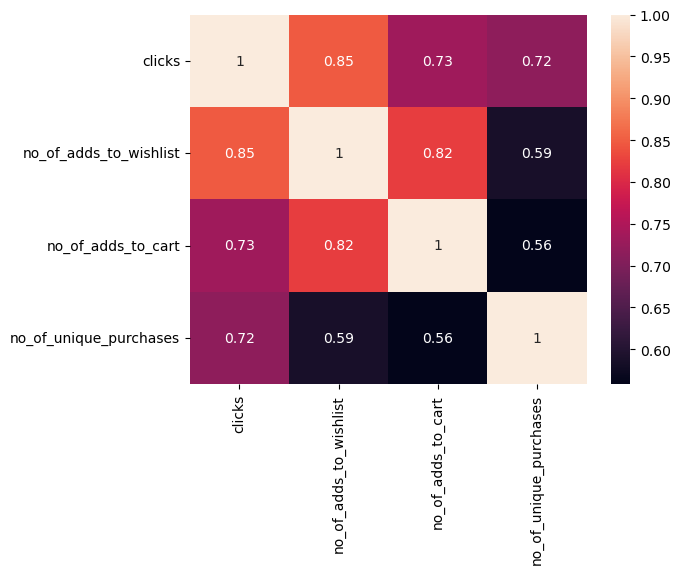

In [115]:
sns.heatmap(df_ml.corr(), annot=True)

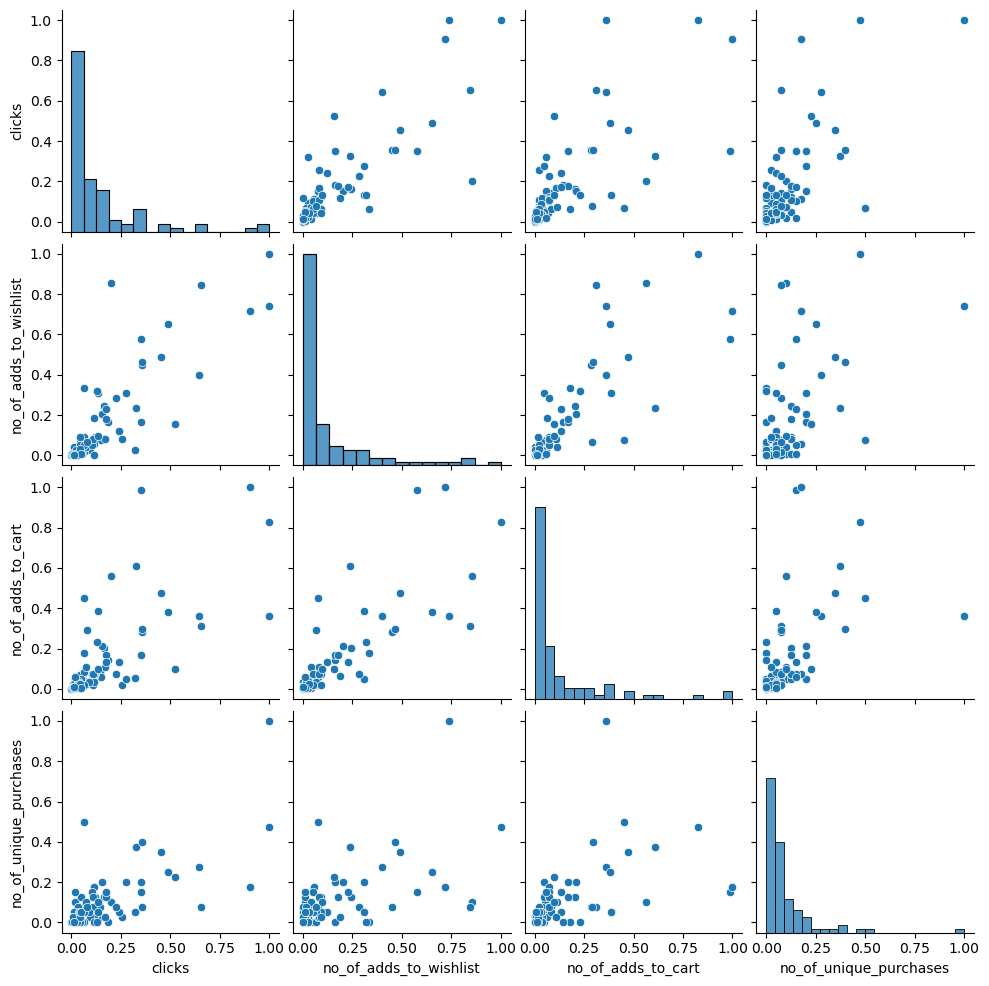

In [116]:
sns.pairplot(df_ml) 

In [117]:
from sklearn.model_selection import train_test_split
import sklearn
import xgboost as xg
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import RepeatedKFold, cross_val_score, KFold
from xgboost import XGBRegressor
from xgboost import plot_importance


In [118]:
X = df_ml[['clicks', 'no_of_adds_to_wishlist', 'no_of_adds_to_cart']]
Y = df_ml['no_of_unique_purchases']

In [119]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,
                      test_size = 0.3, random_state = 123)

<h2>Fitting XGBRegressor with Cross Validation</h2>


In [120]:
xgb_reg = XGBRegressor(verbosity=0)
xgb_reg.fit(x_train, y_train)
train_score = xgb_reg.score(x_train, y_train)

In [121]:
train_score

0.9999489081325419

### Evaluating with Negative Root Mean squared error

In [122]:
cv = KFold(n_splits=10, shuffle=True, random_state=123)
final_scores = cross_val_score(xgb_reg, X, Y, cv=cv, scoring='neg_root_mean_squared_error')
abs(final_scores).mean()

0.12745060787236867

In [123]:
final_scores

array([-0.04199659, -0.10354784, -0.10756196, -0.12163532, -0.05003992,
       -0.27930523, -0.15500725, -0.21760405, -0.02240238, -0.17540554])

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

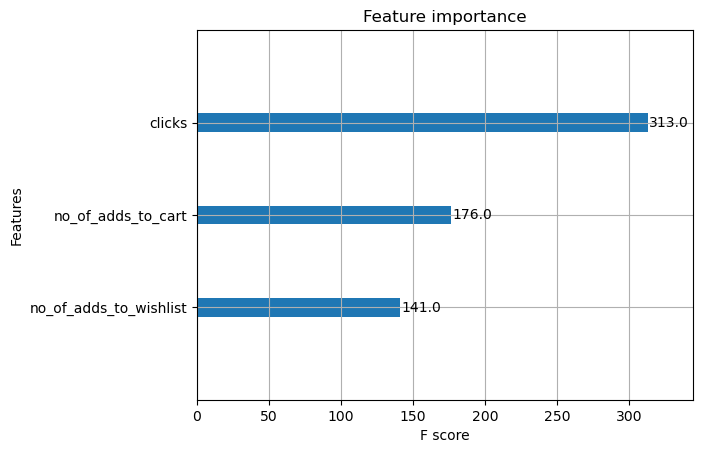

In [124]:
plot_importance(xgb_reg)

In [125]:
xgb_reg.get_booster().get_score(importance_type='weight')

{'clicks': 313.0, 'no_of_adds_to_wishlist': 141.0, 'no_of_adds_to_cart': 176.0}

### Evaluating with second method

In [126]:
xgb_reg.fit(x_train, y_train, eval_metric='rmse', eval_set=[(x_train, y_train), (x_test, y_test)], verbose=True)

[0]	validation_0-rmse:0.31431	validation_1-rmse:0.31267
[1]	validation_0-rmse:0.22676	validation_1-rmse:0.23028
[2]	validation_0-rmse:0.16602	validation_1-rmse:0.17628
[3]	validation_0-rmse:0.12244	validation_1-rmse:0.14324
[4]	validation_0-rmse:0.09135	validation_1-rmse:0.12768
[5]	validation_0-rmse:0.06951	validation_1-rmse:0.11801
[6]	validation_0-rmse:0.05518	validation_1-rmse:0.11076
[7]	validation_0-rmse:0.04387	validation_1-rmse:0.10720
[8]	validation_0-rmse:0.03621	validation_1-rmse:0.10565
[9]	validation_0-rmse:0.02957	validation_1-rmse:0.10508
[10]	validation_0-rmse:0.02536	validation_1-rmse:0.10536
[11]	validation_0-rmse:0.02194	validation_1-rmse:0.10509
[12]	validation_0-rmse:0.01933	validation_1-rmse:0.10499
[13]	validation_0-rmse:0.01728	validation_1-rmse:0.10549
[14]	validation_0-rmse:0.01567	validation_1-rmse:0.10544
[15]	validation_0-rmse:0.01377	validation_1-rmse:0.10560
[16]	validation_0-rmse:0.01272	validation_1-rmse:0.10542
[17]	validation_0-rmse:0.01187	validation

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=10,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=0)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

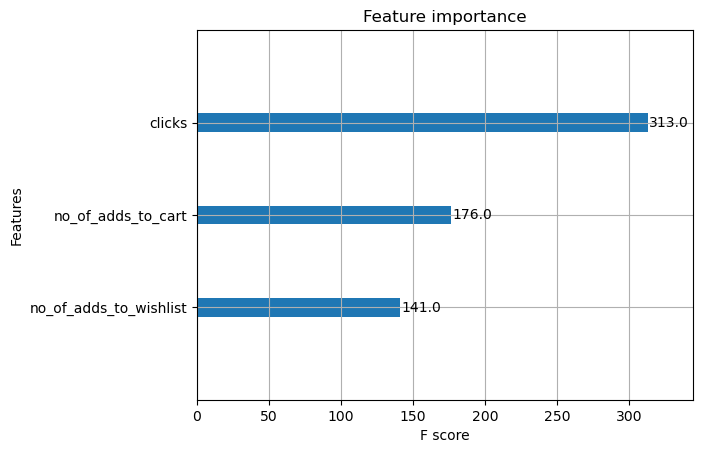

In [127]:
plot_importance(xgb_reg)

In [128]:
f_importance = xgb_reg.get_booster().get_score(importance_type='weight')

f_importance

{'clicks': 313.0, 'no_of_adds_to_wishlist': 141.0, 'no_of_adds_to_cart': 176.0}

In [129]:
importance_df = pd.DataFrame.from_dict(data=f_importance, 
                                       orient='index')
importance_df.columns = ['weights']
importance_df

,weights
clicks,313.0
no_of_adds_to_wishlist,141.0
no_of_adds_to_cart,176.0


In [130]:
importance_df['weights'] = importance_df['weights']/importance_df['weights'].sum()
importance_df

,weights
clicks,0.496825
no_of_adds_to_wishlist,0.223810
no_of_adds_to_cart,0.279365


## Calculating Popularity Score based on the weights

In [131]:
df_joined_brand

,brand,clicks,price,no_of_purchases,no_of_unique_purchases,price_wishlist,no_of_adds_to_wishlist,price_cart,quantity,no_of_adds_to_cart
0,AND,29,1992.0,1.0,1,84462.0,42,187746.0,95.0,89
1,AXE,10,375.0,3.0,3,148.0,2,1089.0,6.0,6
2,Aqualogica,9,1071.0,3.0,3,718.0,3,1782.0,5.0,5
3,Arata,10,1118.0,2.0,2,919.0,1,2196.0,3.0,3
4,Babila,17,130.0,1.0,1,1082.0,4,1223.0,9.0,9
...,...,...,...,...,...,...,...,...,...,...
87,WOW SKIN SCIENCE,20,1014.0,4.0,3,1504.0,5,3821.0,14.0,12
88,Wella Professionals,23,3130.0,3.0,3,1100.0,2,4230.0,4.0,4
89,Yves Rocher,36,10300.0,6.0,4,27150.0,9,370281.0,146.0,143
90,ZM Zayn & Myza,8,339.0,1.0,1,378.0,1,2871.0,9.0,6


In [132]:
df_X = df_joined_brand[['brand', 'clicks', 'no_of_adds_to_wishlist', 'no_of_adds_to_cart', 'no_of_purchases']].copy()

for column in ['clicks', 'no_of_adds_to_wishlist', 'no_of_adds_to_cart', 'no_of_purchases']:
    df_X[column] = (df_X[column] - df_X[column].min()) / (df_X[column].max() - df_X[column].min())    

df_X

,brand,clicks,no_of_adds_to_wishlist,no_of_adds_to_cart,no_of_purchases
0,AND,0.061269,0.333333,0.180328,0.000000
1,AXE,0.019694,0.008130,0.010246,0.047619
2,Aqualogica,0.017505,0.016260,0.008197,0.047619
3,Arata,0.019694,0.000000,0.004098,0.023810
4,Babila,0.035011,0.024390,0.016393,0.000000
...,...,...,...,...,...
87,WOW SKIN SCIENCE,0.041575,0.032520,0.022541,0.071429
88,Wella Professionals,0.048140,0.008130,0.006148,0.047619
89,Yves Rocher,0.076586,0.065041,0.290984,0.119048
90,ZM Zayn & Myza,0.015317,0.000000,0.010246,0.000000


In [133]:
w_purchase = 0.35
w_clicks = importance_df.loc['clicks', 'weights'] * 0.65
w_wishlist = importance_df.loc['no_of_adds_to_wishlist', 'weights'] * 0.65
w_cart = importance_df.loc['no_of_adds_to_cart', 'weights'] * 0.65

w_purchase + w_clicks + w_wishlist + w_cart

1.0

In [137]:
df_popularity_fin = df_X
df_popularity_fin['popularity_score'] = (df_X['no_of_purchases'] * w_purchase + df_X['clicks'] * w_clicks + df_X['no_of_adds_to_wishlist'] * w_wishlist + df_X['no_of_adds_to_cart'] * w_cart)/(w_purchase + w_clicks + w_wishlist + w_cart)

In [138]:
df_popularity_fin.sort_values('popularity_score', ascending=False)

,brand,clicks,no_of_adds_to_wishlist,no_of_adds_to_cart,no_of_purchases,popularity_score
40,Lakme,1.000000,0.739837,0.362705,1.000000,0.846428
47,Maybelline New York,1.000000,1.000000,0.827869,0.452381,0.777077
43,M.A.C,0.903720,0.715447,1.000000,0.452381,0.735845
23,Estee Lauder,0.654267,0.845528,0.311475,0.452381,0.549184
38,L.A. Girl,0.352298,0.577236,0.985656,0.190476,0.443393
...,...,...,...,...,...,...
79,The Natural Wash,0.015317,0.000000,0.002049,0.000000,0.005319
19,Dermafique,0.008753,0.008130,0.002049,0.000000,0.004381
52,Nina Ricci,0.006565,0.008130,0.004098,0.000000,0.004047
68,Sery,0.004376,0.008130,0.002049,0.000000,0.002968
